# DS 7331 Data Mining: Mini Lab iPython Notebook

### Created On: February 11, 2019
### Authors:  
####                 Arora, Tanvi                
####                 Chandna, Rajat
####                 Henderson Kuns, Nicol
####                 Ramasundaram, Kumar
####                 Vasquez, James


### Getting Dataset Ready for Model Building

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [3]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [4]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('Subscribed')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


### Perform One Hot Encoding for categorical variables in dataset

In [6]:
# Make a copy of original data frame
bankPromoModel_Df = bankPromo_df.copy()
bankPromoModel_Df['Target'] = bankPromoModel_Df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_Df['Target'] = bankPromoModel_Df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoModel_Df['Subscribed']





In [7]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_Df = pd.concat((bankPromoModel_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_Df.drop(categoricalVars, inplace=True, axis=1)
bankPromoModel_Df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

### Perform 5 fold Cross Validation with 80/20 Split for Model Selection

In [8]:
# Training and Test Split
from sklearn.model_selection import ShuffleSplit

if 'Target' in bankPromoModel_Df:
    y = bankPromoModel_Df['Target'].values # get the labels we want
    del bankPromoModel_Df['Target']        # get rid of the class label
    X = bankPromoModel_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=999)
                         
print(cv_object)


ShuffleSplit(n_splits=5, random_state=999, test_size=0.2, train_size=None)


### Getting ready Additional Test Dataset(with 10% instances) for final model fitting and weights interpretation 

In [9]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_df = bankPromoAdditional_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
housing       4521 non-null object
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [10]:
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoAdditional_df['Subscribed']

In [11]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_df = pd.concat((bankPromoAdditional_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_df:
    y_Final = bankPromoAdditional_df['Target'].values # get the labels we want
    del bankPromoAdditional_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_df.values

bankPromoAdditional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 42 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secondary    4521 non-n

# Simple Logistic Model Fit

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1.0, class_weight=None, random_state=999))

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    logisticModel.fit(X_train,y_train)  # train object
    y_hat = logisticModel.predict(X_test) # get test set precitions

    # now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())


====Iteration 0  ====
confusion matrix
 [[7769  207]
 [ 706  361]]
====Iteration 1  ====
confusion matrix
 [[7833  184]
 [ 680  346]]
====Iteration 2  ====
confusion matrix
 [[7736  201]
 [ 703  403]]
====Iteration 3  ====
confusion matrix
 [[7772  207]
 [ 696  368]]
====Iteration 4  ====
confusion matrix
 [[7772  232]
 [ 645  394]]


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.899038,0.656189,0.441590,0.635563,0.338332
1,0.904456,0.657140,0.444730,0.652830,0.337232
2,0.900033,0.669526,0.471345,0.667219,0.364376
3,0.900144,0.659961,0.449054,0.640000,0.345865
4,0.903019,0.675113,0.473273,0.629393,0.379211


Average Model Performnace Metrices 


Accuracy     0.901338
AuC          0.663586
F1 Score     0.455999
Precision    0.645001
Recall       0.353003
dtype: float64

**As we can see from above performace metrices that model is not performing very well as overall average AuC score(=0.66) and F1 score(0.46) are relatively poor. Also, model is able to predict subscibers who actually subscribed to service, less than 36% of time ( recall = 0.35). Model accuracy is high but our dataset has class imbalance of approx 89% ( Not Subscribed) to approx 11%(Subscribed). Next we would perform grid search to adjust parameters of the model to make it more accurate, in terms of improved classification metrices esp. AuC score**

# Tuning The Model Hyper Parameters Using Grid Search

In [13]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear'],
    'logisticregression__class_weight' : [None, 'balanced']}


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

clf = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999)), \
                   param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1, scoring=scoring, refit='AUC', \
                   return_train_score=True)

# Fit on data

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    clf.fit(X_train,y_train)  # train object
    y_hat = clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    print("Best Estimator Model Parameters\n", clf.best_params_)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())

====Iteration 0  ====
confusion matrix
 [[6699 1277]
 [ 188  879]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.004291934260128779, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
====Iteration 1  ====
confusion matrix
 [[6829 1188]
 [ 206  820]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
====Iteration 2  ====
confusion matrix
 [[6717 1220]
 [ 186  920]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
====Iteration 3  ====
confusion matrix
 [[6730 1249]
 [ 187  877]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.004291934260128779, 'logisticregression__cla

,Accuracy,AuC,F1 Score,Precision,Recall
0,0.837996,0.831850,0.545455,0.407699,0.823805
1,0.845848,0.825518,0.540541,0.408367,0.799220
2,0.844521,0.839058,0.566852,0.429907,0.831826
3,0.841203,0.833856,0.549843,0.412512,0.824248
4,0.838991,0.835343,0.542426,0.402706,0.830606


Average Model Performnace Metrices 


Accuracy     0.841712
AuC          0.833125
F1 Score     0.549023
Precision    0.412238
Recall       0.821941
dtype: float64

- **As we can see from above performace metrices this model has performed better as compared to previous model in that the overall average AuC has improved from 0.66 to 0.83. F1 score improved from 0.45 to 0.55. Also, recall has improved significantly from 0.35 to 0.82. That said, overall accuracy decreased a little from 0.90 to 0.84 and precision drop by about 0.20. But since, overall AuC and F1 improved, by changing Prior probabilities, a balance between pricision and recall could be achieved. Moreover, in reality probabilty of people subscribing to a term deposit is not 50-50. Also, increased false positive rate means that bank would be making some extra calls that would not yield positive result but since recall is high, model is less likely to miss people who actually want to subscribe to bank deposit.**


- Next we will go ahead and select the **model weights using third iteration model** that yielded relatively max values for both AuC and accuracy; and interpret the importance of different features for this classification task using validation on  **additional 10% of values dataset**


- **Later in Exceptional Work section, we would try to increase complexity of the model by adding polynomial terms and interactions and see if that would incease accuracy, AuC and F1 score further (since we see such small value of C) . And run grid search on that degree=2 polynomial logistic regression model.**


- **Also, we would perform Recursive feature selection(RFE) to decrease number of features in our model and see whether that changes AuC,accuracy,F1,precision and recall values.**  

**NOTE: In above model, we havn't performed any explicit feature section but relied upon l1 penalty and regularization to control for overfitting.** 

Fitting The Model:
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} as discussed above to Additional Dataset.
 

In [14]:
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.009102981779915217,\
                                                                   class_weight='balanced', random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel.fit(X,y) 
y_hat = logisticModel.predict(X_Final) # get test set precitions

# now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
tmpDict = dict()
tmpDict['Accuracy'] = mt.accuracy_score(y_Final,y_hat)
tmpDict['AuC'] = mt.roc_auc_score(y_Final,y_hat)
tmpDict['F1 Score'] = mt.f1_score(y_Final,y_hat)
tmpDict['Precision'] = mt.precision_score(y_Final,y_hat)
tmpDict['Recall'] = mt.recall_score(y_Final,y_hat)
    
modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

conf = mt.confusion_matrix(y_Final,y_hat)
  
print("confusion matrix\n",conf)
    
print("\n Model Performnace Metrices")
display(modelPerformanceMetrices)



confusion matrix
 [[3374  626]
 [ 106  415]]

 Model Performnace Metrices


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.838089,0.820023,0.53137,0.398655,0.796545


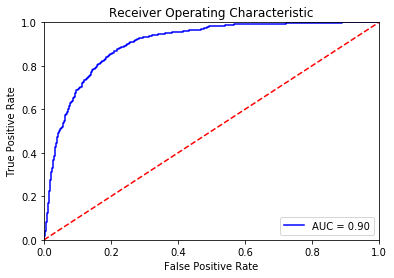

In [15]:
# Plot the RoC Curve
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
probs = logisticModel.predict_proba(X_Final)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_Final, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Interpret Feature Importance

contact_unknown has weight of -0.6597393606569804
housing_yes has weight of -0.36483034349530163
month_jul has weight of -0.3182031838425452
month_may has weight of -0.2584796849950919
campaign has weight of -0.25795236961394996
month_aug has weight of -0.24537673422001902
month_nov has weight of -0.21238259353740632
loan_yes has weight of -0.1802869371328466
month_jan has weight of -0.1743427941843215
job_blue-collar has weight of -0.09689472462982444
poutcome_unknown has weight of -0.0837662971448729
marital_married has weight of -0.07059163186041814
job_housemaid has weight of -0.041484793114395256
job_services has weight of -0.02375225497825546
job_entrepreneur has weight of -0.021159304305913475
job_self-employed has weight of -0.019972927198734423
job_unknown has weight of -0.003907411376158106
age has weight of 0.0
contact_telephone has weight of 0.0
default_yes has weight of 0.0
job_management has weight of 0.0
job_technician has weight of 0.0
job_unemployed has weight of 0.0
m

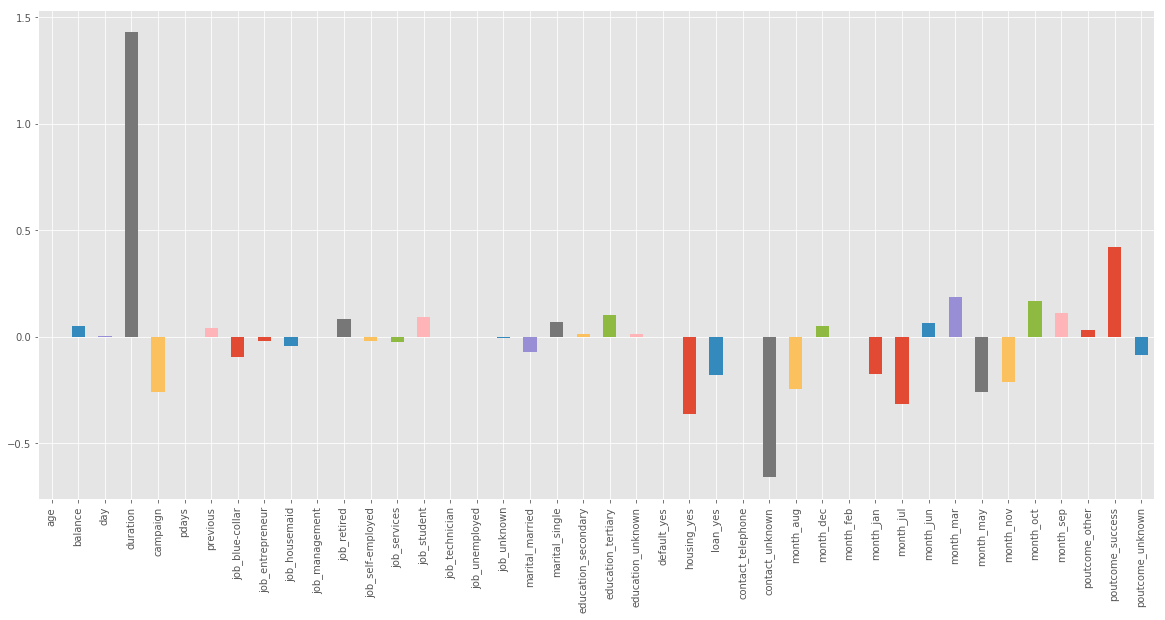

In [16]:
classifier_model = logisticModel.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_Df.columns)
weights.plot(kind='bar')
plt.show()

***********  **TANVI** : To Add Feature Importance Interpretation Such as Duration of call isthe  most impoortant feature in order to predict the people who want subscribe to promotion. This is intuitive since generally, people who want subscribe to promotion want more information on the offering and providing all such details generally takes time for representative, resulting in higher call durations. The importance of this feature was quite apperant in the EDA phase.  **********

# Simple SVM Model Fit

In [20]:
from sklearn.svm import SVC
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run SVM model

svmModel = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999))

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    svmModel.fit(X_train,y_train)  # train object
    y_hat = svmModel.predict(X_test) # get test set precitions

    # now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())

====Iteration 0  ====
confusion matrix
 [[7790  186]
 [ 739  328]]
====Iteration 1  ====
confusion matrix
 [[7847  170]
 [ 679  347]]
====Iteration 2  ====
confusion matrix
 [[7768  169]
 [ 731  375]]
====Iteration 3  ====
confusion matrix
 [[7785  194]
 [ 701  363]]
====Iteration 4  ====
confusion matrix
 [[7796  208]
 [ 689  350]]


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.897711,0.642042,0.414927,0.638132,0.307404
1,0.906115,0.658501,0.449773,0.671180,0.338207
2,0.900476,0.658883,0.454545,0.689338,0.339060
3,0.901028,0.658426,0.447872,0.651706,0.341165
4,0.900807,0.655438,0.438322,0.627240,0.336862


Average Model Performnace Metrices 


Accuracy     0.901227
AuC          0.654658
F1 Score     0.441088
Precision    0.655519
Recall       0.332540
dtype: float64

# Tuning The Model Hyper Parameters for SVM Using Grid Search

In [ ]:
# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

param_grid = {
     'svc__kernel' : ['poly', 'rbf', 'sigmoid'],
    'svc__C' : np.logspace(-4, 4, 20),
    'svc__degree' : [1,2,3],
    'svc__class_weight' : [None, 'balanced'],
    'svc__gamma': [0.001, 0.01, 0.1, 1,'auto']}


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

clf = GridSearchCV(make_pipeline(StandardScaler(), SVC(random_state=999)), \
                   param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1, scoring=scoring, refit='AUC', \
                   return_train_score=True)

# Fit on data

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    clf.fit(X_train,y_train)  # train object
    y_hat = clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    print("Best Estimator Model Parameters\n", clf.best_params_)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706

# Interpret Support Vectors

# Model Advantages

# Exceptional Work

### Running Polynomial Logistic Regression 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.simplefilter('ignore', UserWarning)

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear'],
    'logisticregression__class_weight' : [None, 'balanced']}


# Create grid search object
# Trying to find params that lead to maximum F1 Score
clf = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LogisticRegression(random_state=999)), \
                   param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1, scoring='f1')

# Fit on data

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    clf.fit(X_train,y_train)  # train object
    y_hat = clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    print("Best Estimator Model Parameters\n", clf.best_params_)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())

### Running Recursive Feature Elimination to Reduce Curse of Dimensionality

Run the RFE in CV mode, in 5 Fold CV there would be 5 passes and in each pass features that are not that important to classification task are listed as output.
Remove a feature from the dataset, if the feature is marked for elimination by RFE in 2 passes out of 5.
Recreate the dataset with only non-eliminated features and fit the model again on this dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

featureSelectionArr = np.full((len(bankPromoModel_Df.columns)), True)

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model
scl_obj = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # Standardize the train dataset and then apply the transform the test data. 
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train)
    X_test_scaled = scl_obj.transform(X_test)
    
    # train the reusable logisitc regression model on the training data
#    lr_clf.fit(X_train_scaled,y_train)  # train object

    rfe = RFE(lr_clf, 25)
    fit = rfe.fit(X_train_scaled,y_train)  # train object

    featureSelectionArr = np.vstack((featureSelectionArr, fit.support_ ))
    


In [ ]:
# remove the first row in feature array as it was dummy row.
featureSelectionArr = featureSelectionArr[1: , :]

In [ ]:
# Keep only those feature that appear important in 3 out of 5 passes.
bankPromoModel_Df.columns[np.sum(featureSelectionArr, axis = 0) >= 3]

In [ ]:
# Make a copy of original data frame
bankPromoModel_Df_1 = bankPromo_df.copy()
bankPromoModel_Df_1['Target'] = bankPromoModel_Df_1['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_Df_1['Target'] = bankPromoModel_Df_1['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoModel_Df_1['Subscribed']

In [ ]:
# Covert all categorical variables to corresponding indicator variables
categoricalVarsToBeUsed = ['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

for categoricalVar in categoricalVarsToBeUsed:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_Df_1[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_Df_1 = pd.concat((bankPromoModel_Df_1, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_Df_1.drop(categoricalVars, inplace=True, axis=1)

# Now remove non useful numerical variables
bankPromoModel_Df_1.drop(['age', 'balance', 'pdays', 'previous'], inplace=True, axis=1)
bankPromoModel_Df_1.info()

In [ ]:
# Training and Test Split
from sklearn.model_selection import ShuffleSplit

if 'Target' in bankPromoModel_Df_1:
    y = bankPromoModel_Df_1['Target'].values # get the labels we want
    del bankPromoModel_Df_1['Target']        # get rid of the class label
    X = bankPromoModel_Df_1.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

In [ ]:
# Fitting the model on reduced dataset
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

degrees = np.arange(1, 2)

model = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2', C=1.0, class_weight=None))

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    model.fit(X_train,y_train)  # train object
    y_hat = model.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    pre = mt.precision_score(y_test,y_hat)
    rec = mt.recall_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    auc = mt.roc_auc_score(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("AuC", auc )
    print("accuracy", acc )
    print("precision", pre)
    print("recall", rec)
    print("confusion matrix\n",conf)